In [1]:
import numpy as np
import matplotlib.pyplot as plt

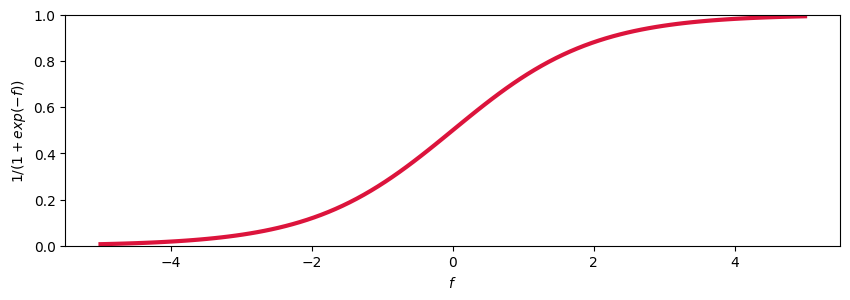

In [5]:
x = np.linspace(-5, 5, 100)
y = 1. / (1 + np.exp(-x))

fig = plt.figure(figsize=(10,3))
plt.plot(x, y, '-', lw=3, color='crimson')
plt.xlabel(r'$f$')
plt.ylabel(r'$1/(1 + exp(-f))$')
plt.ylim(0, 1)
plt.savefig('sigmoid.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()


In [ ]:
import numpy as np

# Squared Exponential Kernel
def squared_exponential_kernel(X1, X2, lengthscale, variance):
    sq_norm = np.sum((X1[:, None] - X2)**2, axis=2)  
    return variance * np.exp(-sq_norm / (2 * lengthscale**2))

# Gaussian Process Class
class GaussianProcessClassifier:
    def __init__(self, lengthscale=1.0, variance=1.0):
        self.lengthscale = lengthscale
        self.variance = variance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        K = squared_exponential_kernel(X, X, self.lengthscale, self.variance)
        self.K = K + np.eye(len(X)) * 1e-8  # Add small noise for stability

    def predict(self, X_test):
        K_star = squared_exponential_kernel(X_test, self.X_train, self.lengthscale, self.variance)
        K_starstar = squared_exponential_kernel(X_test, X_test, self.lengthscale, self.variance)

        f_mean = K_star.T @ np.linalg.solve(self.K, self.y_train)
        f_var = K_starstar - K_star.T @ np.linalg.solve(self.K, K_star)
        # Approximate probabilities (not fully calibrated)
        probs = 0.5 * (1 + scipy.special.erf(f_mean / np.sqrt(2 * (f_var + 1e-8))))
        return probs

# ... (Load your dataset into X and y)

# Create the GP classifier
gp_classifier = GaussianProcessClassifier(lengthscale=1.0, variance=1.0) 

# Train (fit) the model
gp_classifier.fit(X, y)

# Make predictions on new data
predictions = gp_classifier.predict(X_test) 
